# Image Classification using CNN Model

**Import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


**Load and preprocess the dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


**Visualize the Data**

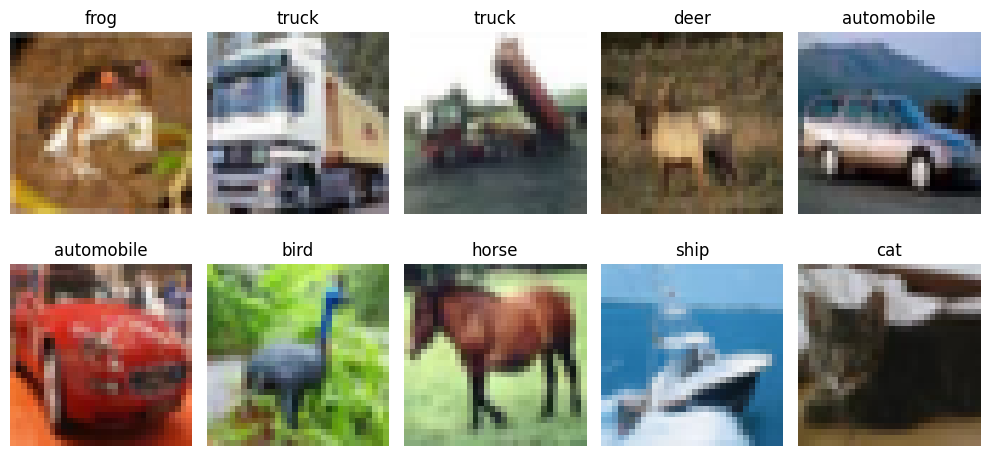

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Build the CNN Model**

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])



**Compile the Model**

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Train the Model**

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
model.save('image_classification_model.h5')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8457 - loss: 0.4425 - val_accuracy: 0.6974 - val_loss: 0.9875
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8543 - loss: 0.4197 - val_accuracy: 0.6962 - val_loss: 1.0157
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8657 - loss: 0.3814 - val_accuracy: 0.7022 - val_loss: 1.0248
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8750 - loss: 0.3641 - val_accuracy: 0.7065 - val_loss: 1.0525
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.8813 - loss: 0.3375 - val_accuracy: 0.7000 - val_loss: 1.1005
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8905 - loss: 0.3105 - val_accuracy: 0.6996 - val_loss: 1.1401
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9008 - loss: 0.2839 - val_accuracy: 0.6954 - val_loss: 1.1628
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9053 - loss: 0.2684 - 

**Evaluate the Model**

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 - 2s - 7ms/step - accuracy: 0.6830 - loss: 1.3314
Test accuracy: 68.30%


**Visualize Training Performance**

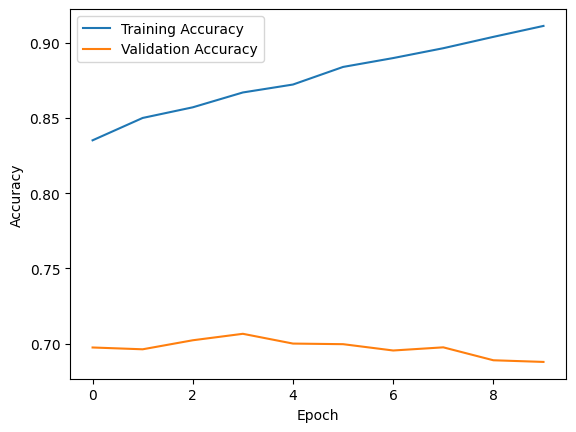

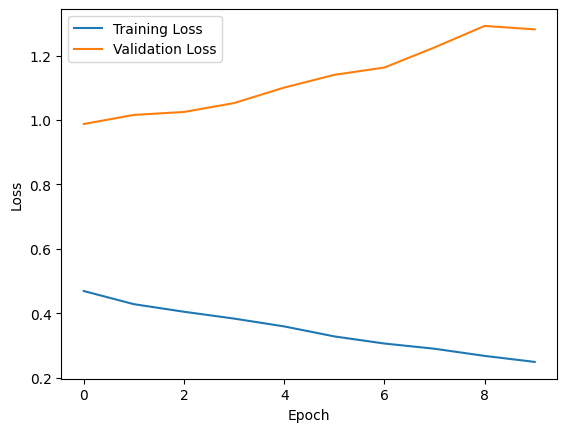

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Make Predictions on Test Data**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


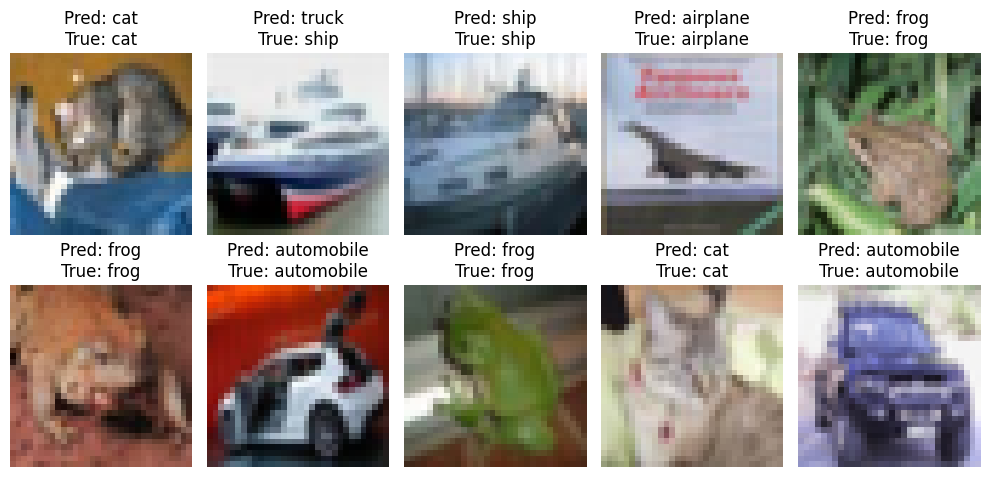

In [21]:
predictions = model.predict(X_test)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[np.argmax(y_test[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
